In [80]:
#importing packages

%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [81]:
#loading data

df = pd.read_csv('credit.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [82]:
#shape of data
df.shape

(284807, 31)

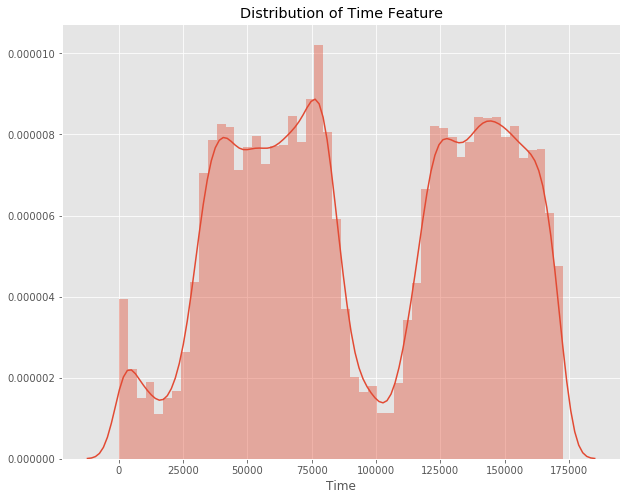

In [83]:
#visualizations of time 

plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

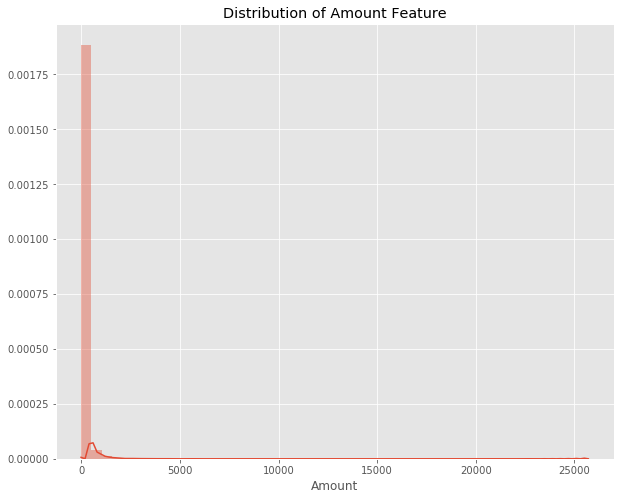

In [84]:
#visualizations of amount

plt.figure(figsize=(10,8))
plt.title('Distribution of Amount Feature')
sns.distplot(df.Amount)

In [85]:
#count of fraud vs. normal transactions 

counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions and {} fraudulent transactions.'.format(normal,fraudulent))

There were 284315 non-fraudulent transactions and 492 fraudulent transactions.


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

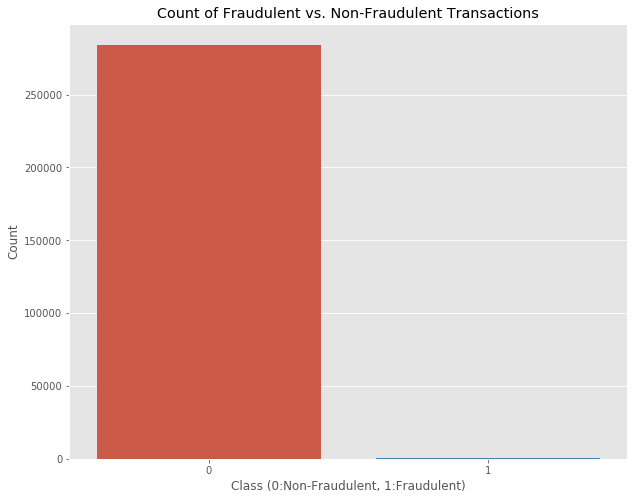

In [86]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')


Text(0.5, 1.0, 'Heatmap of Correlation')

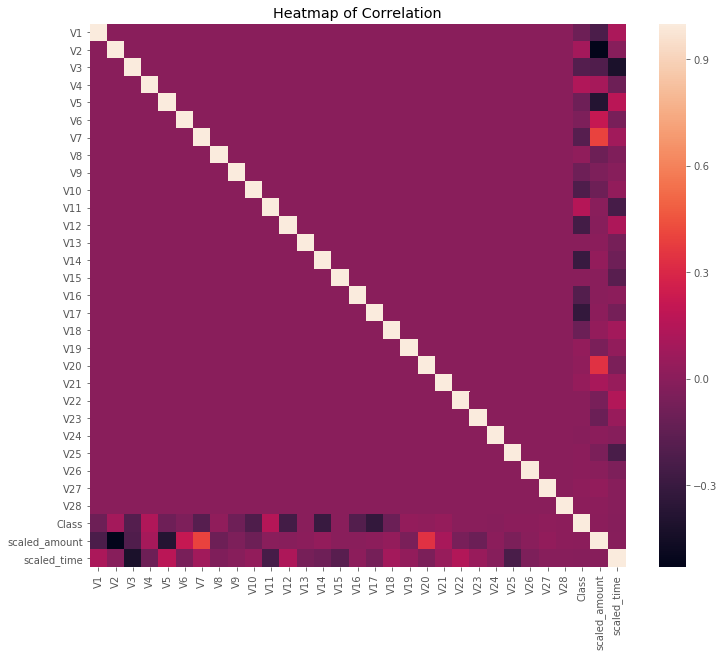

In [109]:
#finding correlation between columns and plotting heatmap

corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()


In [88]:
#scaling Time feature

scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]    # making a flat list out of a list of lists
scaled_time = pd.Series(flat_list1)


In [89]:
#scaling Amount feature

scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [90]:
# adding the scaled features and dropping the unscaled features from the original dataframe

df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

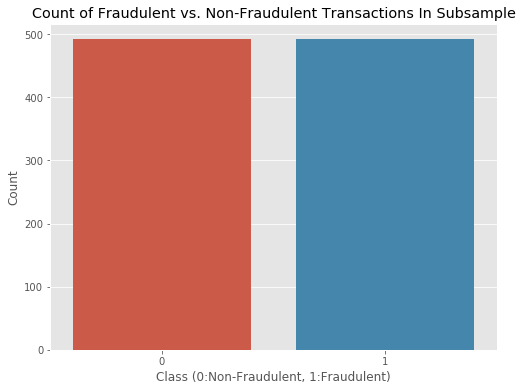

In [91]:
# undersampling with 1:1 ratio of legal and fraud transactions

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]

new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [93]:
# correlation between features in the subsample

corr = under_sample.corr()
corr = corr[['Class']]

In [94]:
corr[corr.Class < -0.5] # features with high negative correlation

,Class
V3,-0.563369
V9,-0.559227
V10,-0.628056
V12,-0.685756
V14,-0.749096
V16,-0.591931
V17,-0.563358


In [95]:
corr[corr.Class > 0.5]  # features with high positive correlation

,Class
V4,0.718274
V11,0.684206
Class,1.000000


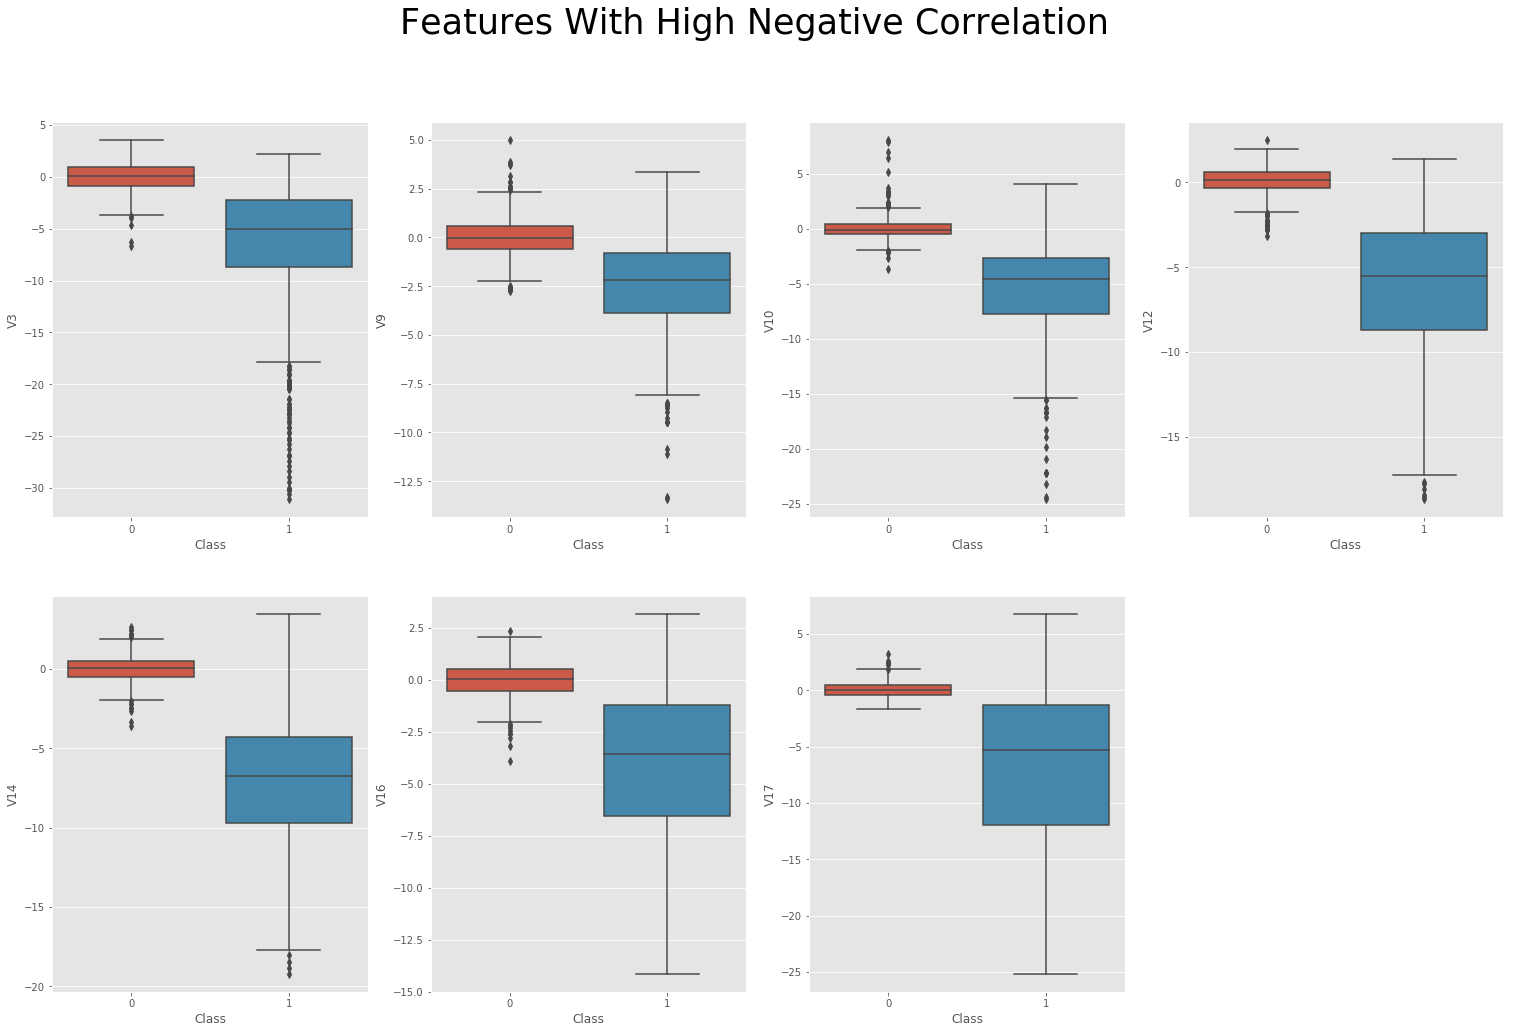

In [96]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=under_sample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=under_sample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=under_sample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=under_sample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=under_sample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=under_sample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=under_sample, ax=axes[1,2])
f.delaxes(axes[1,3])

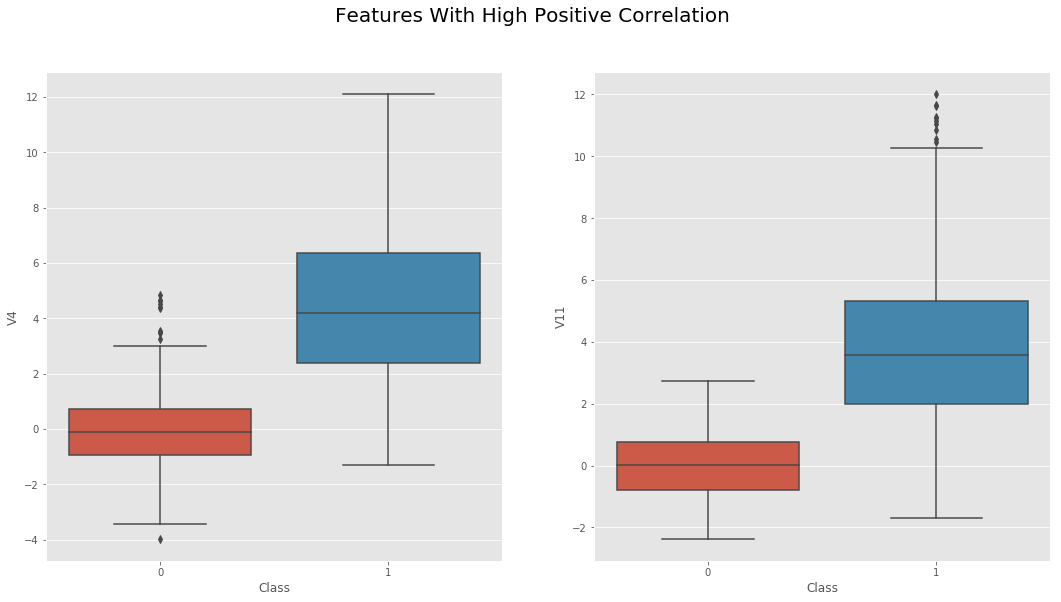

In [97]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=under_sample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=under_sample, ax=axes[1])

In [98]:
# removing extreme outliers
Q1 = under_sample.quantile(0.25)
Q3 = under_sample.quantile(0.75)
IQR = Q3 - Q1

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [99]:
len_after = len(df2)
len_before = len(under_sample)
len_difference = len(under_sample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'
      .format(len_before, len_difference, len_after))

We reduced our data size from 984 transactions by 294 transactions to 690 transactions.


In [100]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [101]:
#splitting data

X = df2.drop('Class', axis=1)
y = df2['Class']

from sklearn.model_selection import train_test_split

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [102]:

#importing relevant packages

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [103]:
# parameter tuning for svm

def svc_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params_svm = svc_param_selection(X_under_train,y_under_train)

print(best_params_svm)

{'C': 10, 'gamma': 0.01}


In [104]:
# parameter tuning for Random Forest

def rf_param_selection(X, y):
    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params = rf_param_selection(X_under_train,y_under_train)

print(best_params)

{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [107]:
#evaluation of the three algorithms

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))



#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9429679211236597
ROC-AUC: 0.9696502398794464


Support Vector Machine:

F1 Score: 0.9532248745937819
ROC-AUC: 0.969447729019218


Random Forest:

F1 Score: 0.9384756318812638
ROC-AUC: 0.9661990511780283




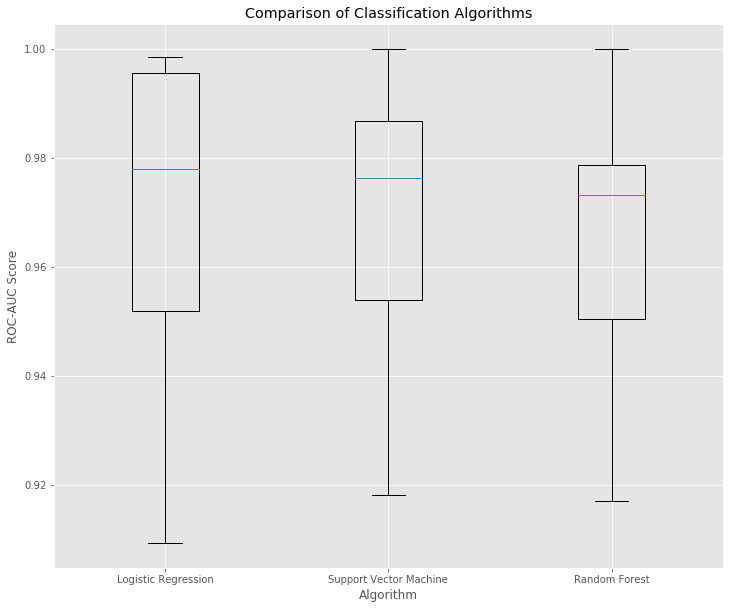

In [108]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()
